# My sample Jupyter Notebook

In [1]:
import sys
sys.version_info

sys.version_info(major=3, minor=6, micro=1, releaselevel='final', serial=0)

In [2]:
%%javascript
MathJax.Hub.Config({ // enable MathJax auto-numbering (no nb extension)
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [3]:
%%javascript
MathJax.Hub.Queue( // reset MathJax equation numbering
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

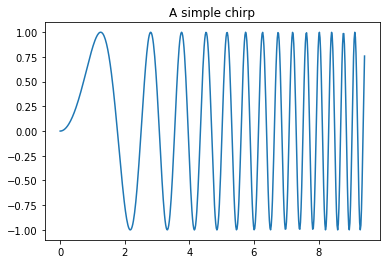

In [5]:
x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp');

## Setting up files for Jekyll

From the command line:
`jupyter nbconvert --to markdown <notebook>.ipynb --config jekyll.py`

Now some LaTeX magic:

$$
E = m c^2
$$

Be aware that this is a markdown cell inside a Jupyter notebook, and the formula is converted by Jupyter.

## Experiments

In [6]:
import math
import numpy as np
import tables as pt
from IPython.display import display, Math, Latex, SVG

### The wing

In [7]:
c_r = 4.0; c_t = 1.5; b = 27; Lambda_le = 25*math.pi/180

In [8]:
Latex(
    r'\begin{array}{rl}'
    +  r'\text{root chord,}\, c_{\mathrm{r}}: & ' + r'{0}'.format(c_r) + r'\,\text{m}'
    +  r'\newline'
    +  r'\text{tip chord,}\, c_{\mathrm{t}}: & ' + r'{0}'.format(c_t) + r'\,\text{m}'
    +  r'\newline'
    +  r'\text{span,}\, b: & ' + r'{0}'.format(b) + r'\,\text{m}'
    +  r'\newline'
    +  r'\text{leading edge sweep,}\, \Lambda_{\mathrm{le}}: &' 
    +    r'{0}'.format(Lambda_le*180/math.pi) + r'\,\text{deg}'
    +r'\end{array}'
)

<IPython.core.display.Latex object>

## Testing tikz output in Jupyter notebooks

In [9]:
%load_ext tikzmagic

Then start each cell with the magic string: `%%tikz` followed by optional directives.

_Directives:_

    -s, --size: Pixel size of plots.
                example: -s <width,height>. Default is -s 400,240
                
    -f, --format: Plot format (png, svg or jpg)

    -l, --library: TikZ libraries to load, separated by comma.
                example: -l matrix,arrows.

    -S, --save: Save a copy to "filename".
    
    -p, --package: LaTeX packages to load, separated by comma.
                example: -p pgfplots,textcomp

    -e, --encoding: text encoding.
                example: -e utf-8

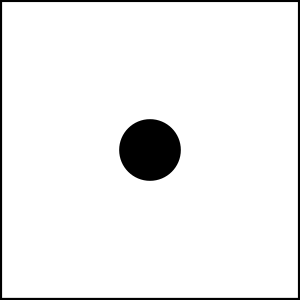

In [10]:
%%tikz --scale 2 --size 300,300 -f svg
\draw (0,0) rectangle (1,1);
\filldraw (0.5,0.5) circle (.1);

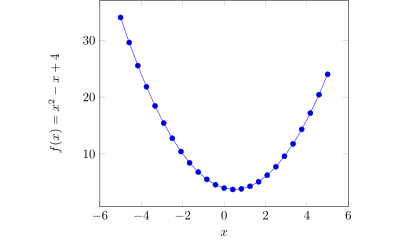

In [11]:
%%tikz -p pgfplots -f svg
\begin{axis}[
  xlabel=$x$,
  ylabel={$f(x) = x^2 - x +4$}
]
\addplot {x^2 - x +4};
\end{axis}

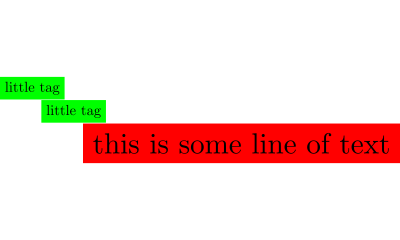

In [12]:
%%tikz -p pgfplots -f svg -l calc,positioning
\path node[fill=red](ROW_1){this is some line of text};
\path node
[   fill=green,
    above=0mm of ROW_1.north west,
    xshift=-5mm,
    anchor=south west,
    scale=0.5
] (lt) {little tag};

\path node
[   fill=green,
    above left=0mm and 5mm of lt.north west,
    anchor=south west,
    scale=0.5
]{little tag};

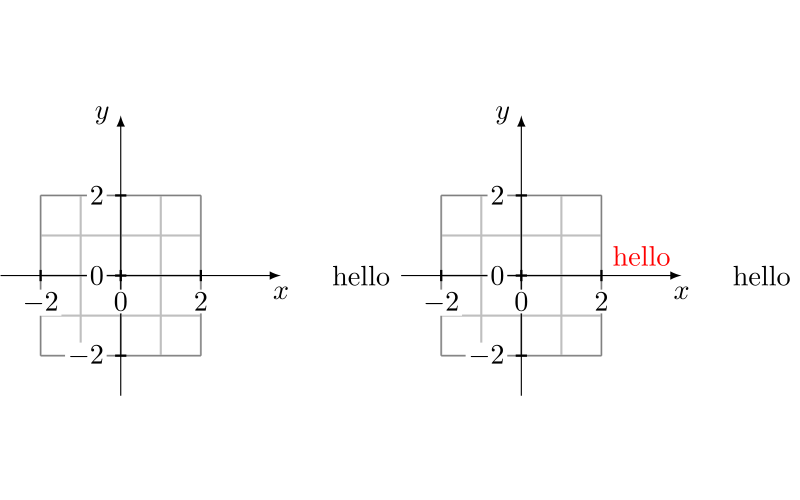

In [13]:
%%tikz -p tkz-fct -l positioning -f svg -s 800,500

\begin{scope}
\tkzInit[xmin=-3,xmax=3,xstep=2, ymin=-3,ymax=3,ystep=2]
\tkzGrid[sub,subxstep=1,subystep=1](-2,-2)(2,2)
\tkzAxeXY
\node (a) at (3,0) {hello};
\end{scope}

\begin{scope}[xshift=5cm]
\tkzInit[xmin=-3,xmax=3,xstep=2, ymin=-3,ymax=3,ystep=2]
\tkzGrid[sub,subxstep=1,subystep=1](-2,-2)(2,2)
\tkzAxeXY
\node (b) at (3,0) {hello};
\tkzText[above,color=red](3,0){hello}
\end{scope}

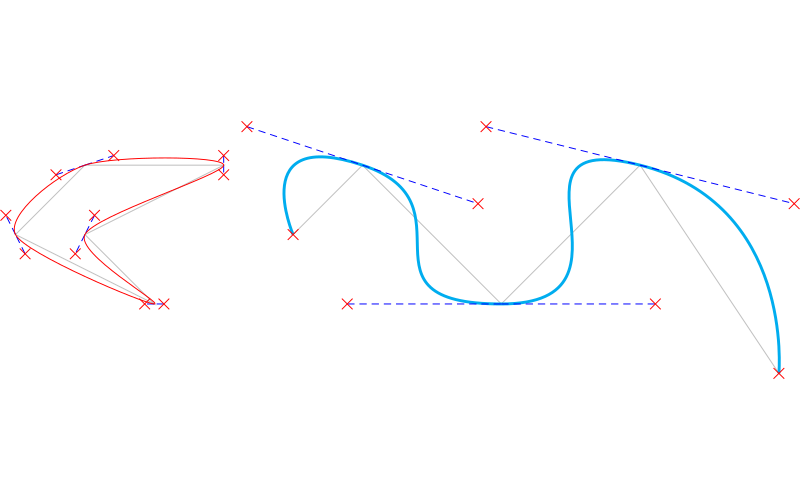

In [14]:
%%tikz -l decorations.pathreplacing,shapes.misc -f svg -s 800,500

\tikzset{
    show curve controls/.style={
        decoration={
            show path construction,
            curveto code={
                \draw [blue, densely dashed]
                    (\tikzinputsegmentfirst) -- (\tikzinputsegmentsupporta)
                    node [at end, cross out, draw, solid, red, inner sep=2pt]{};
                \draw [blue, densely dashed]
                    (\tikzinputsegmentsupportb) -- (\tikzinputsegmentlast)
                    node [at start, cross out, draw, solid, red, inner sep=2pt]{};
            }
        }, decorate
    }
}

\draw [gray!50]  (0,0) -- (1,1) -- (3,1) -- (1,0)  -- (2,-1) -- cycle;
\draw [show curve controls] plot [smooth cycle] coordinates {(0,0) (1,1) (3,1) (1,0) (2,-1)};
\draw [red] plot [smooth cycle] coordinates {(0,0) (1,1) (3,1) (1,0) (2,-1)};

\draw [gray!50, xshift=4cm]  (0,0) -- (1,1) -- (3,-1) -- (5,1) -- (7,-2);
\draw [cyan, xshift=4cm, line width=1.2pt] plot [smooth, tension=2] coordinates { (0,0) (1,1) (3,-1) (5,1) (7,-2)};
\draw [show curve controls,cyan, xshift=4cm] plot [smooth, tension=2] coordinates { (0,0) (1,1) (3,-1) (5,1) (7,-2)};